# Import Libraries and import Data

In [1]:
#Import Libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./mushrooms.csv') #Mushroom Classification DB from Kaggle

In [3]:
df.describe() #All columns have 8124 values, and this means there is no missing value.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.head() #Showing database to check the whole configuration

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info() #To confirm whether there are numerical values or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Import DecisionTreeClassifier from Sklearn

In [6]:
from sklearn import tree #Decision Tree

In [7]:
dtc = tree.DecisionTreeClassifier(criterion='entropy') #Make the criterion entropy

# Encoding

Because DecisionTreeClassifier from Sklearn cannot deal with the categorical values, we have to transform the categorical variables to numerical values. In this case, we need to utilize the encoding.

In [8]:
from sklearn.preprocessing import LabelEncoder 
#There are lots of encoding methods, but I would like to utilize LabelEncoder.
#Because I can make them encoded within a column.

In [9]:
le = LabelEncoder()

In [10]:
encoded_df = [] #Temporary list for eoncding 
df_concat=pd.DataFrame()
for i in df.columns: #LabelEncoder can only deal with each column.
    le.fit(df[i])
    encoded_df = pd.DataFrame(le.transform(df[i]))
    df_concat = pd.concat([df_concat,encoded_df],axis=1)

In [11]:
df_concat.columns = df.columns #Take the original column names from the original database.
df_concat

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [12]:
y_whole = df_concat['class'] #Confirm whether Y is correct.
y_whole

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [13]:
X_whole = df_concat.drop('class',axis=1) #Confirm whether X is correct.
X_whole

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [14]:
dtc.fit(X_whole,y_whole) #To check the feature importance

DecisionTreeClassifier(criterion='entropy')

In [15]:
#For Feature Selection, I utilized the imporatnce with 'entropy' criterion.
feature_importance_df = pd.DataFrame(
    data={
        'feature': X_whole.columns,
        'importance': dtc.feature_importances_    
    }
)

In [16]:
#Based on the importance of Criterion(Entorpy), I sorted the values.
feature_importance_sorted = feature_importance_df.sort_values(by='importance',ascending=False)
feature_importance_sorted

,feature,importance
19,spore-print-color,0.379276
8,gill-color,0.269650
7,gill-size,0.150039
10,stalk-root,0.101321
3,bruises,0.027191
21,habitat,0.027012
4,odor,0.023459
20,population,0.016877
11,stalk-surface-above-ring,0.005174
9,stalk-shape,0.000000


Text(0.5, 1.0, 'The importance of features')

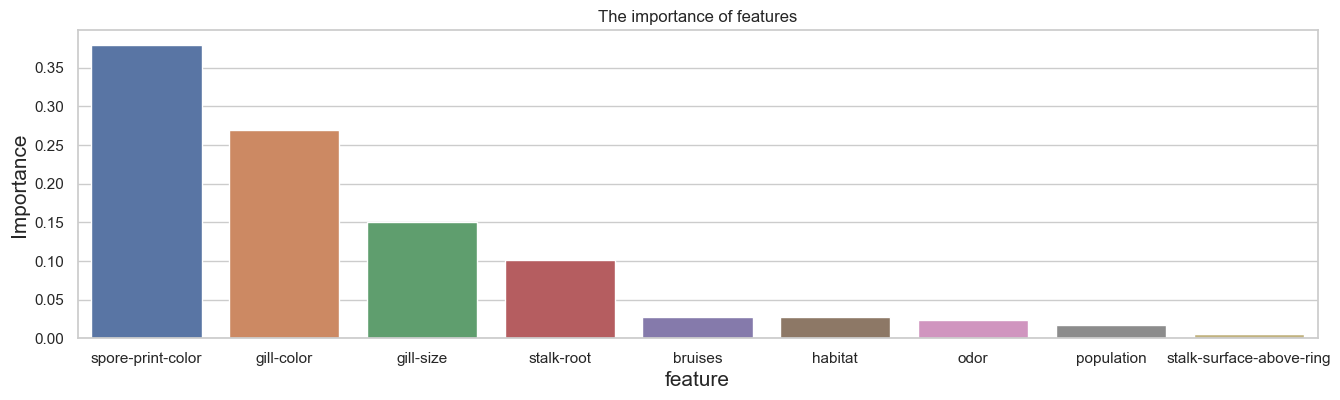

In [17]:
#To visualize the sorted values of importance with Seaborn
plt.figure(figsize=(16,4))
sns.set(style='whitegrid')
sns.barplot(x='feature', y='importance',data=feature_importance_sorted.head(9))
plt.xlabel('feature',fontsize=15)
plt.ylabel('Importance',fontsize=15)
plt.title('The importance of features')

In [18]:
#Based on the above barplot, we can expect only 4 fatures will be meaningful.
feature_importance_sorted.head(4)

,feature,importance
19,spore-print-color,0.379276
8,gill-color,0.269650
7,gill-size,0.150039
10,stalk-root,0.101321


In [19]:
#Take the column names to extract X(independent variables) from the original value
col = feature_importance_sorted.head(4)['feature']
col

19    spore-print-color
8            gill-color
7             gill-size
10           stalk-root
Name: feature, dtype: object

In [20]:
#Take the independent variables
X = df_concat[col]
X

,spore-print-color,gill-color,gill-size,stalk-root
0,2,4,1,3
1,3,4,0,2
2,3,5,0,2
3,2,5,1,3
4,3,4,0,3
...,...,...,...,...
8119,0,11,0,0
8120,0,11,0,0
8121,0,5,0,0
8122,7,0,1,0


In [22]:
#Take the dependent variables
y = df_concat['class']

In [24]:
#Import the library for the train_test_split
from sklearn.model_selection import train_test_split

In [25]:
#Divide the variables into Train and Test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
#Train the decision tree classifier with train database
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [27]:
prediction = dtc.predict(X_test)

In [28]:
#Visualise the decision tree process
from graphviz import Source

In [29]:
graph = Source(tree.export_graphviz(dtc, out_file=None, 
                                    feature_names=X.columns,
                                    class_names=pd.unique(df['class']),
                                    filled=True,
                                   )
              )
graph.render('the_result_of_DTC',format='png')

'the_result_of_DTC.png'

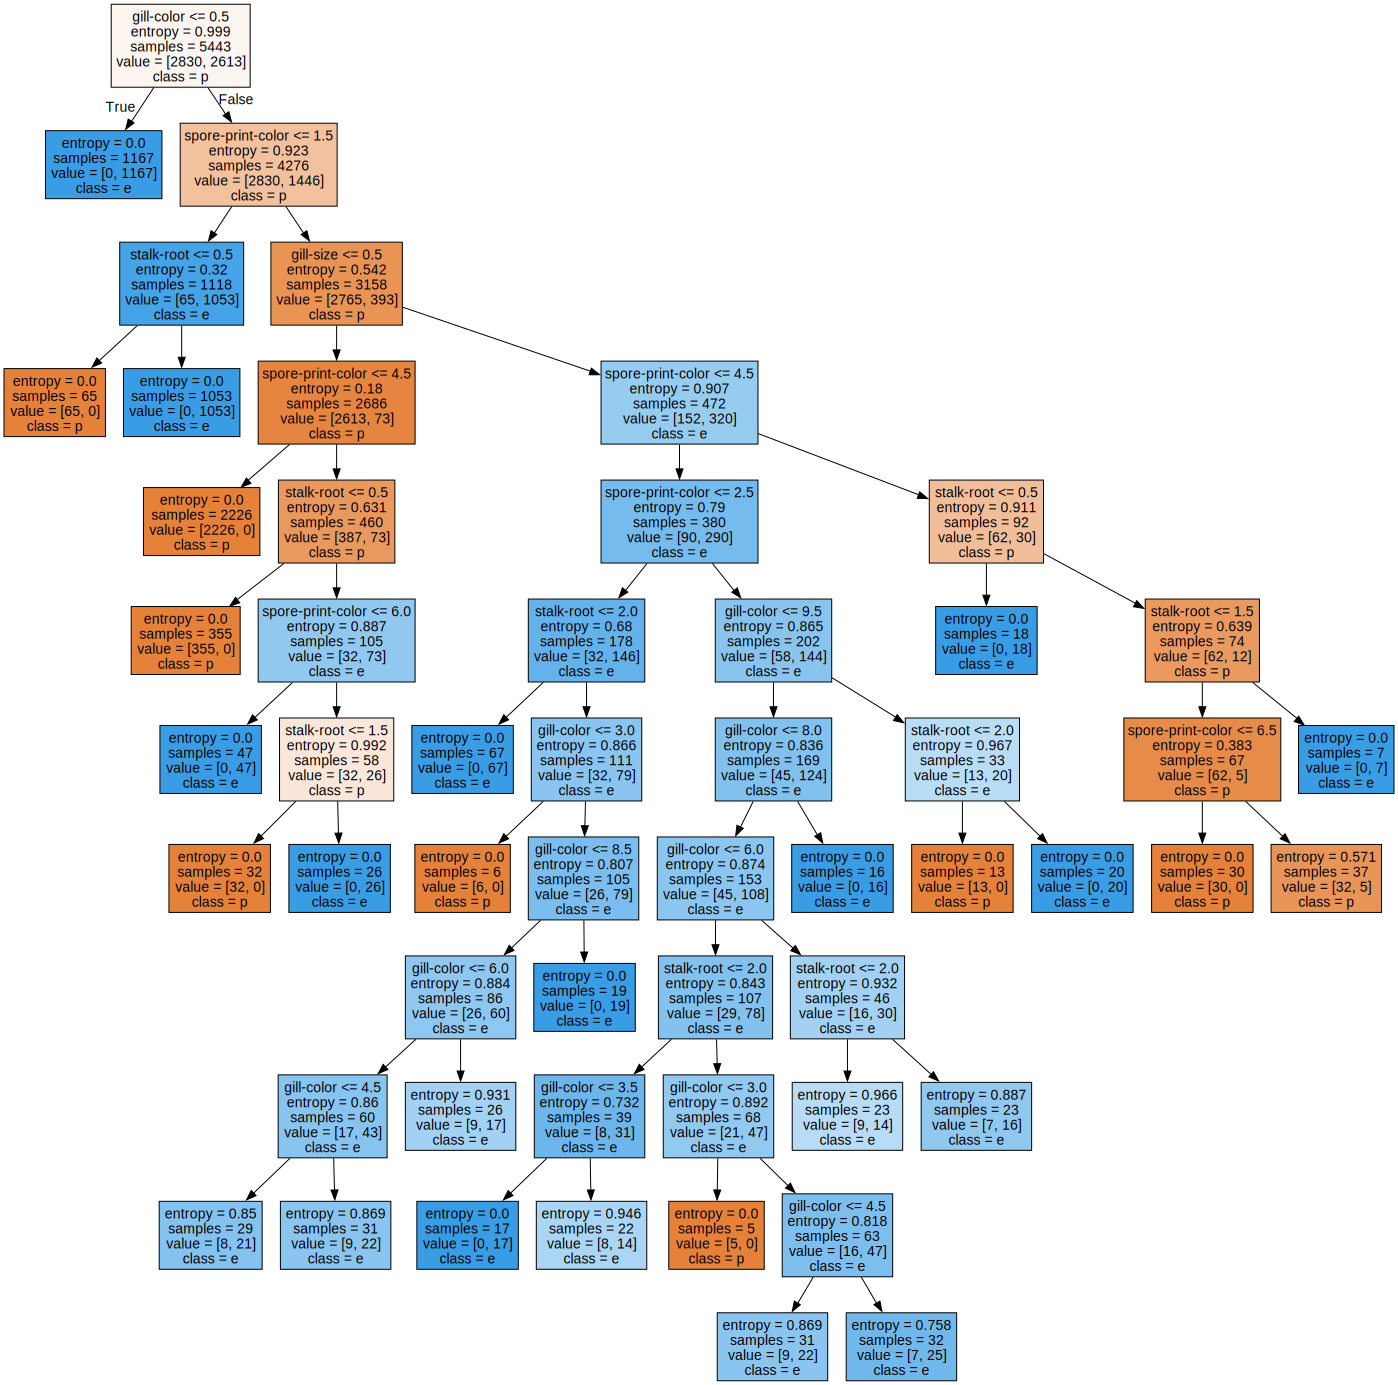

In [30]:
#display the decision tree
graph

In [31]:
#Evaluate this model with 'classification report, confusion matrix and accuracy score'
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
print('Classification_report: \n',classification_report(y_test, prediction),'\n')
print('Confusion_matrix: \n',confusion_matrix(y_test, prediction),'\n')
print('Accuracy_score: \n',accuracy_score(y_test, prediction))
#The accuracy score of this model is more than 98%, and this means this model is quite accurate.

Classification_report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1378
           1       0.97      1.00      0.98      1303

    accuracy                           0.98      2681
   macro avg       0.98      0.99      0.98      2681
weighted avg       0.99      0.98      0.98      2681
 

Confusion_matrix: 
 [[1340   38]
 [   3 1300]] 

Accuracy_score: 
 0.9847071988064156
